In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# **PHYS 481 - Assignment 5**
## **Josh Houghton**
---
---

## **Introduction**

In this assignment, I explored several topics within statistical mechanics. Specifically, I used computational methods to simulate and analyze the Pauli paramagnet, as well as the spin-1 Pauli paramagnet, two systems whose features rely heavily on statistical mechanics.

## **Problem 4.1.2 - Simulating the Pauli Paramagnet**

### **Methodology**

For this problem, I was tasked with analyzing the Pauli paramagnet system. In particular, the main outcome was to gain insight in to how the system responded to different external magnetic fields, as well as different temperatures.

To begin, I first created a program that would calculate the total energy, entropy, and magnetization of the system. It is important to note, that in order to simplify these computations, all variables were transformed such that they had no correspondence to actual units. This is a common method in computational physics, as it still allows us to compare systems to see how different variables will change or react, without the complications of units, extremely small or large numbers, etc. The system itself is a fairly common system used in statistical mechanics, and is comprised of $N$ electrons, each of which may exhibit one of two states at any given time. These states are called either up spin, or down spin. The total energy, entropy, and magnetization are all dependent on the arrangements of these spins. In particular, for our dimensionless variables, the energy was simply defined to be the difference between down and up spin electrons. The entropy is determined by the dimensionless form of the Shannon-Boltzmann entropy. Finally, the magnetization of the system is dependent only on the number of electrons present, as well as the temperature of the system and the external magnetic field that it is in. This problem was split into two parts, both of which employed separate methods to analyze the system.

The first part of this problem was to create a simulation of the Pauli paramagnet in which the dimensionless magnetic field $B$ and temperature $T$ could be varied. In varying these, the idea was that we would be able to compute all variables of interest along the way, in order to see how they respond in different conditions. To execute this, I began by defining several Python functions. The first of these functions was used to calculate the total energy $U$ of the system in a given state. I opted to represent the total system by a NumPy array, which contained values of either 1 or 0. The array values of 1 corresponded to an electron with spin up, and those of value 0 corresponded to spin down. This made the calculation of energy very simple, as it only involved counting the number of each value and taking the difference between the number of zeros present, and the number of ones present, which would then return the dimensionless total energy of the array that was passed as an arguement in the function. The next function I defined was a very simple one that took $N$, $B$, and $T$ as arguements, and returned the magnetization of the system, as calculated by the formula

$$M=N\tanh{\left(\frac{B}{T}\right)}$$

The third and final function that I defined was used to compute the dimensionless Shannon Boltzmann entropy, which is given by 

$$S=-N\left[p_1 \ln{\left(p_1 \right)} + p_2 \ln{\left(p_2 \right)}\right]$$

where $p_1$ and $p_2$ are the "probabilities" of an electron having an up or down state. To create an accurate representation of the statistics of this system, these probabilities were sampled probabilistically, by counting the number of each electron spin that were present in the system at the current time, and dividing that by the total number of electrons. That way, the actual Shannon-Boltzmann entropy of the system (unitless) could be calculated, and was returned.

Now that all of the necessary functions were defined, I was able to build the main body of my code that would actually vary the temperature and magnetic field strength, calculating all variables of interest along the way, and store these results for analysis. To do this I created a function called find_vars, which took arguements of $N$, $B$, and $T$. Within this function, the first thing that had to be done was to calculate the probabilities $p_1$ and $p_2$, which are completely dependedent on the magnetic field strength as well as the temperature as indicated by the below definitions.

$$p_1=\frac{1}{2}\left(1+ \tanh{\left(\frac{B}{T}\right)}\right) $$

$\hspace{0pt}$

$$p_2=\frac{1}{2}\left(1- \tanh{\left(\frac{B}{T}\right)}\right) $$

Then, after creating the empty array of $N$ cells to represent the system, I initialized a for loop that iterated $N$ times, through each "electron" in the array. For each iteration, a random decimal number between one and zero, $r$, was retrieved using Numpy.random. Then, if $r$ was less than or equal to $p_1$ the electron corresponding to the current iteration was initialized to have spin up, and vice versa for spin down. Defining the function in this manner meant that the current state of the system was indeed random, but abided by the probabilities that were predetermined by the magnetic field strength and temperature. After this was done, all that was left to do was call our previous functions to compute the entropy, energy, and magnetization of the current system, which were then returned. I also created a function to compute the theoretical values for these variables, in a very similar manner. The only thing that really differed with this function, is that the number of up or down spin electrons in the array was not random in any way as they abided presicely to what would be expected given their probabilities.

To analyze the results, I created loops that would iterate through many different $T$ and $B$ values, calling this master function each time. I opted to create one cell that would simply print all of the results for different combinations of $T$ and $B$, should the user want to see them. For a better mode of analysis, I also created two cells, each of which plotted a number of different graphs of the results. In particular, one cell plotted the theoretical results for energy, entropy, and magnetization, all as functions of tempetature. The other cell created the same cell using the probabilistically determined experimental results for comparison.

For the second part of this problem, I was tasked with doing some similar analysis, but this time by varying the conditions of the system in a different way. In particular, I began by assuming that $N$ and $B$ were fixed, and the variation in the system arose only by numerically changing the probabilities. It is important to note, that although I did keep $B$ fixed for each trial, I ran several different trials in which I changed $B$, just to get a better idea of how the system would react. To undertake this part of the problem, for each $B$ I begain by defining four lists, to keep track of $T$, $U$, $S$, and $M$, for purposes of plotting. Once these were defined, I created a for loop that would iterate through incrementing values of $p_1$. Within each loop, $p_2$ was first calculated just by the fact that the two probabilities add up to unity. After this was done, I calculated the dimensionless temperature using a numerical approach that took advantage of the fact that the partial derivative of $S$ with respect to $U$ gives the inverse temperature. In other words, my program would compute the approximate temperature according to the probabilities by evaluating the finite difference

$$T = \frac{U(p_{i+1})-U(p_i)}{S(p_{i+1})-S(p_i)}$$

where $p_{i+1}$ just represents the probabilites of the next iteration. To make sure that this was an accurate approximation, I designed the program such that for each iteration, the probabilities only differed by 0.001. One thing that I noticed with applying this method was the fact that in some cases, this finite difference method would result in a negative temperature, which is obviously useless as it has no physical meaning. To combat this, I simply included a conditional statement to first make sure that the temperature was greater than zero before continuing. If this condition was not met, the program would simply move on to the next iteration. However, in the case that the resulting temperature was indeed positive, the program was now at the point where it was ready to compute all of the variables of interest. At this point, I inserted the necessary equations; the same as those employed previously, to compute $U$, $S$, and $M$. After this was done, I added the calculated values to their respective lists so that they could later be plotted. Since I decided to do this process for multiple $B$ values I simply ran this whole algorithm within another for loop, this time iterating through different $B$ values, which would be used in the calculation of the magnetization, $M$. After this was done, I was able to simply plot all of my results, as was done before, to compare with the results that were obtained from the previous part of the problem. Once again, I opted to plot energy, entropy, and magnetization, all as functions of temperatue.

### **Code**

**Part (a)**

In [ ]:
# function to calculate and return the energy of the system array passed as an arguement
def energy(array, B):
  n_up = np.count_nonzero(array == 1)
  n_down = np.count_nonzero(array == 0)
  net_spin = n_down - n_up
  U = net_spin
  return U

# function to calculate and return the magnet for a system of given N, B, and T 
def magnet(N,B,T):
  M = N*math.tanh(B/T)
  return M

# function to calculate and return the entropy of the system array passed as an arguement
def entropy(N, array):
  n_up = np.count_nonzero(array == 1)
  n_down = np.count_nonzero(array == 0)
  p_up = n_up / N
  p_down = n_down / N
  if p_up == 0:
    S = -N*(p_down*math.log(p_down))
  if p_down == 0:
    S = -N*(p_up*math.log(p_up))
  if p_up != 0 and p_down != 0:
    S = -N*(p_up*math.log(p_up) + p_down*math.log(p_down))

  return S

In [ ]:
# master function used to calculate and return all of the variables of interest
# using the approach of probabalistic sampling
def find_vars(N,B,T):
  # calculating the probabilities for spin up and spin down
  p1 = (1/2)*(1+math.tanh(B/T))
  p2 = (1/2)*(1-math.tanh(B/T))

  # initializes the system array
  spin = np.zeros((1,N))
  spin = spin[0]

  # for loop that iterates through each 'electron' in the array
  for i, elec in enumerate(spin):
    # takes a random number and compares it to the probabilities to deterimine the state of 
    # this iteration's electron
    r = random.random()
    if r <= p1:
      spin[i] = 1
    else:
      spin[i] = 0

  # calculates and returns the entropy, energy, and magnetization for the given system
  S = entropy(N, spin)
  U = energy(spin, B)
  M = magnet(N, B, T)

  return U, S, M



# this function does the exact same thing as the one above, the only difference
# is that it does not randomly sample according to the probabilities. Instead, the 
# state of the system is determined to correspond EXACTLY to what is dictated by the probabilities
def theor_vars(N,B,T):
  p1 = (1/2)*(1+math.tanh(B/T))
  p2 = (1/2)*(1-math.tanh(B/T))

  n1 = int(round(N*p1,0))
  n2 = int(round(N*p2,0))

  spin = np.zeros((1,N))
  spin = spin[0]

  for i in range(n1):
    spin[i] = 1

  S = entropy(N, spin)
  U = energy(spin, B)
  M = magnet(N, B, T)

  return U, S, M

In [ ]:
# This cell first asks for input to confirm if the user wants to see all of the printed results.
# If yes, then the program iterates through a number of B and T values, calling the master functin each
# time to calculate and print the experimental results

N = 200
B_list = np.arange(0,2.01,0.1)
T_list = np.arange(1,10.01,1)

while True:
  ans = input("This cell will print ALL of the results, of which there are a lot... Would you like the results printed? (Yes or No)")
  if ans == "Yes" or ans == "yes" or ans == "YES" or ans == "Y" or ans == "y":
    # loop to iterate though B values
    for B in B_list:
      T_vals = []
      U_vals = []

      # loop to iterate though T values
      for T in T_list:
        # calculating variables of interest using our previously defined function, and printing them
        U, S, M = find_vars(N,B,T)
        print("For B =",round(B,1),"and T =",T,"we find:")
        print("\tEnergy =",U)
        print("\tEntropy =",S)
        print("\tMagnetization =",M)
        print("")
    break

  elif ans == "No" or ans == "no" or ans == "NO" or ans == "N" or ans == "n":
    print("")
    print("Printed Results have been skipped, scroll down for graphs.")
    break

  print("")
  print("Invalid Input...")
  print("")


This cell will print ALL of the results, of which there are a lot... Would you like the results printed? (Yes or No)y
For B = 0.0 and T = 1.0 we find:
	Energy = 0
	Entropy = 138.62943611198907
	Magnetization = 0.0

For B = 0.0 and T = 2.0 we find:
	Energy = 4
	Entropy = 138.58943344489566
	Magnetization = 0.0

For B = 0.0 and T = 3.0 we find:
	Energy = -2
	Entropy = 138.61943594531573
	Magnetization = 0.0

For B = 0.0 and T = 4.0 we find:
	Energy = -6
	Entropy = 138.53942260712674
	Magnetization = 0.0

For B = 0.0 and T = 5.0 we find:
	Energy = 16
	Entropy = 137.9887516916799
	Magnetization = 0.0

For B = 0.0 and T = 6.0 we find:
	Energy = 10
	Entropy = 138.37933184101598
	Magnetization = 0.0

For B = 0.0 and T = 7.0 we find:
	Energy = 2
	Entropy = 138.61943594531573
	Magnetization = 0.0

For B = 0.0 and T = 8.0 we find:
	Energy = 12
	Entropy = 138.26921980034786
	Magnetization = 0.0

For B = 0.0 and T = 9.0 we find:
	Energy = 2
	Entropy = 138.61943594531573
	Magnetization = 0.0

For B

	THEORETICAL RESULTS
--------------------------------------


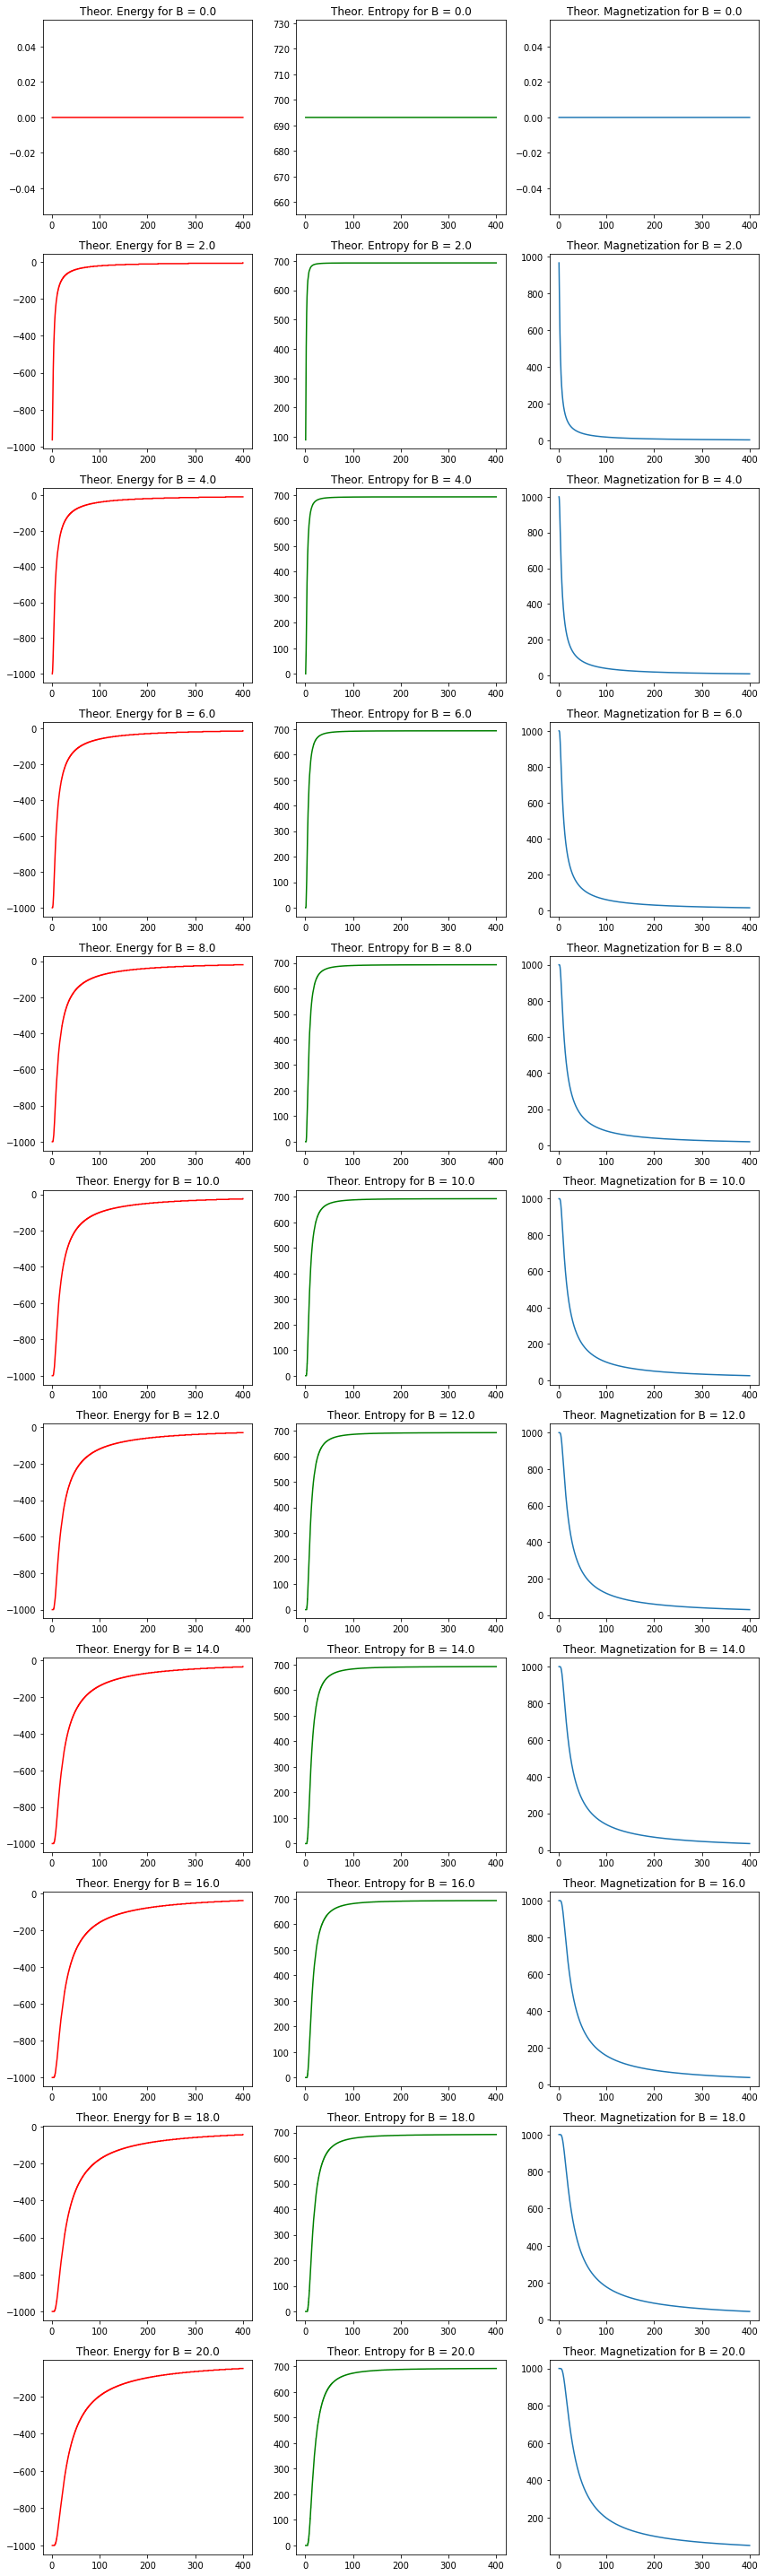

In [ ]:
# this cell creates some plots of the theoretical results

# initializing the number of electrons in the system, as well as the values of $T$ and
# $B$ that will be cycled through
N = 1000
B_list = np.arange(0,20.01,2)
T_list = np.arange(1,400.01,0.1)

nPlots = len(B_list)

fig, ax = plt.subplots(nPlots,3,figsize=(12,40))

# loop to iterate through B values
for i, B in enumerate(B_list):
  T_vals = []
  U_vals = []
  S_vals = []
  M_vals = []

  # loop to iterate through T values
  for T in T_list:
    # calculates the variables of interest using the theoretical formula,
    # passing the current B and T values as arguements
    U, S, M = theor_vars(N,B,T)
    T_vals += [T]
    U_vals += [U]
    S_vals += [S]
    M_vals += [M]

  # plotting stuff
  B = round(B,1)
  ax[i][0].plot(T_vals, U_vals,color='red')
  ax[i][0].set_title("Theor. Energy for B = "+str(B))
  ax[i][1].plot(T_vals, S_vals,color='green')
  ax[i][1].set_title("Theor. Entropy for B = "+str(B))
  ax[i][2].plot(T_vals, M_vals)
  ax[i][2].set_title("Theor. Magnetization for B = "+str(B))

print("\tTHEORETICAL RESULTS")
print("--------------------------------------")
plt.tight_layout()
plt.show()

	EXPERIMENTAL RESULTS
--------------------------------------


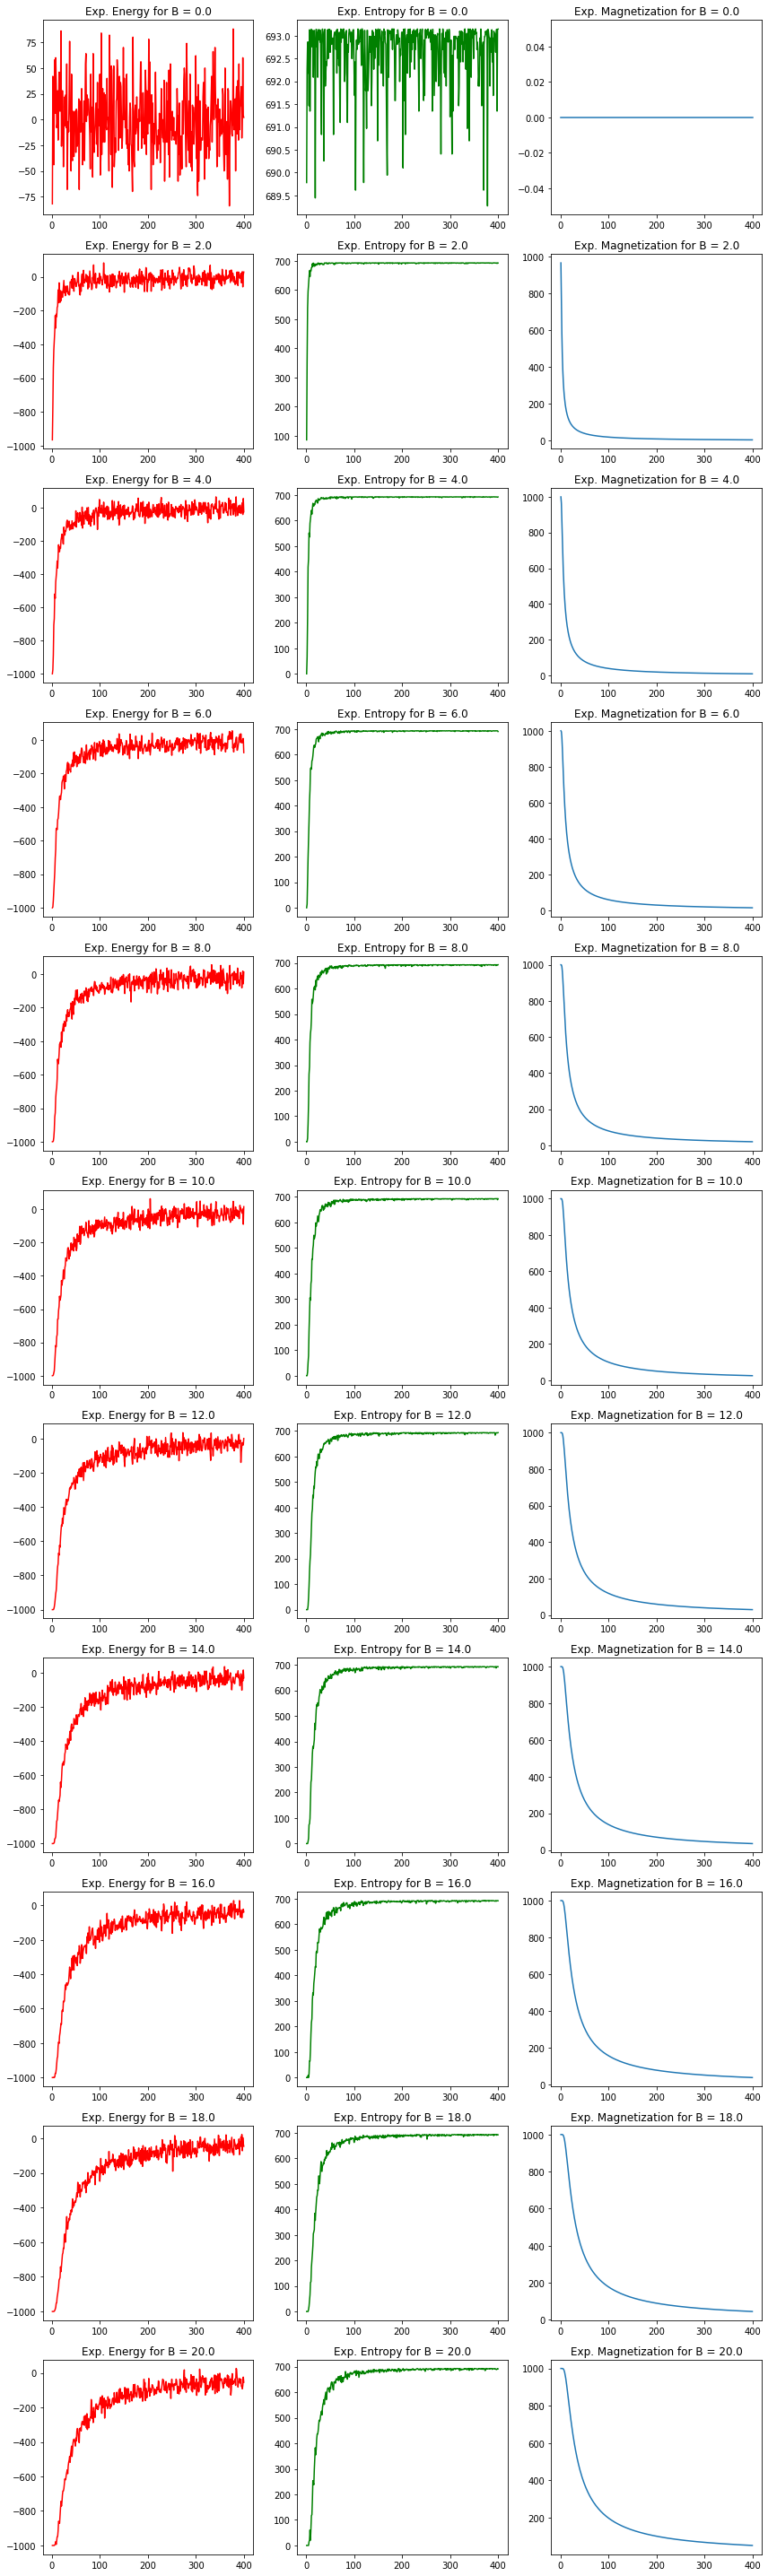

In [ ]:
# this cell is identical to the one above, but instead using the experimental results

N = 1000
B_list = np.arange(0,20.01,2)
T_list = np.arange(1,400.01,1)

nPlots = len(B_list)

fig, ax = plt.subplots(nPlots,3,figsize=(12,40))

# loop to iterate through B values
for i, B in enumerate(B_list):
  T_vals = []
  U_vals = []
  S_vals = []
  M_vals = []

  # loop to iterate through T values
  for T in T_list:
    # calculates variables of interest using the find_vars function,
    # passing the current B and T values as arguements
    U, S, M = find_vars(N,B,T)
    T_vals += [T]
    U_vals += [U]
    S_vals += [S]
    M_vals += [M]

  # plotting stuff
  B = round(B,1)
  ax[i][0].plot(T_vals, U_vals,color='red')
  ax[i][0].set_title("Exp. Energy for B = "+str(B))
  ax[i][1].plot(T_vals, S_vals,color='green')
  ax[i][1].set_title("Exp. Entropy for B = "+str(B))
  ax[i][2].plot(T_vals, M_vals)
  ax[i][2].set_title("Exp. Magnetization for B = "+str(B))

print("\tEXPERIMENTAL RESULTS")
print("--------------------------------------")
plt.tight_layout()
plt.show()

**Part (b)**

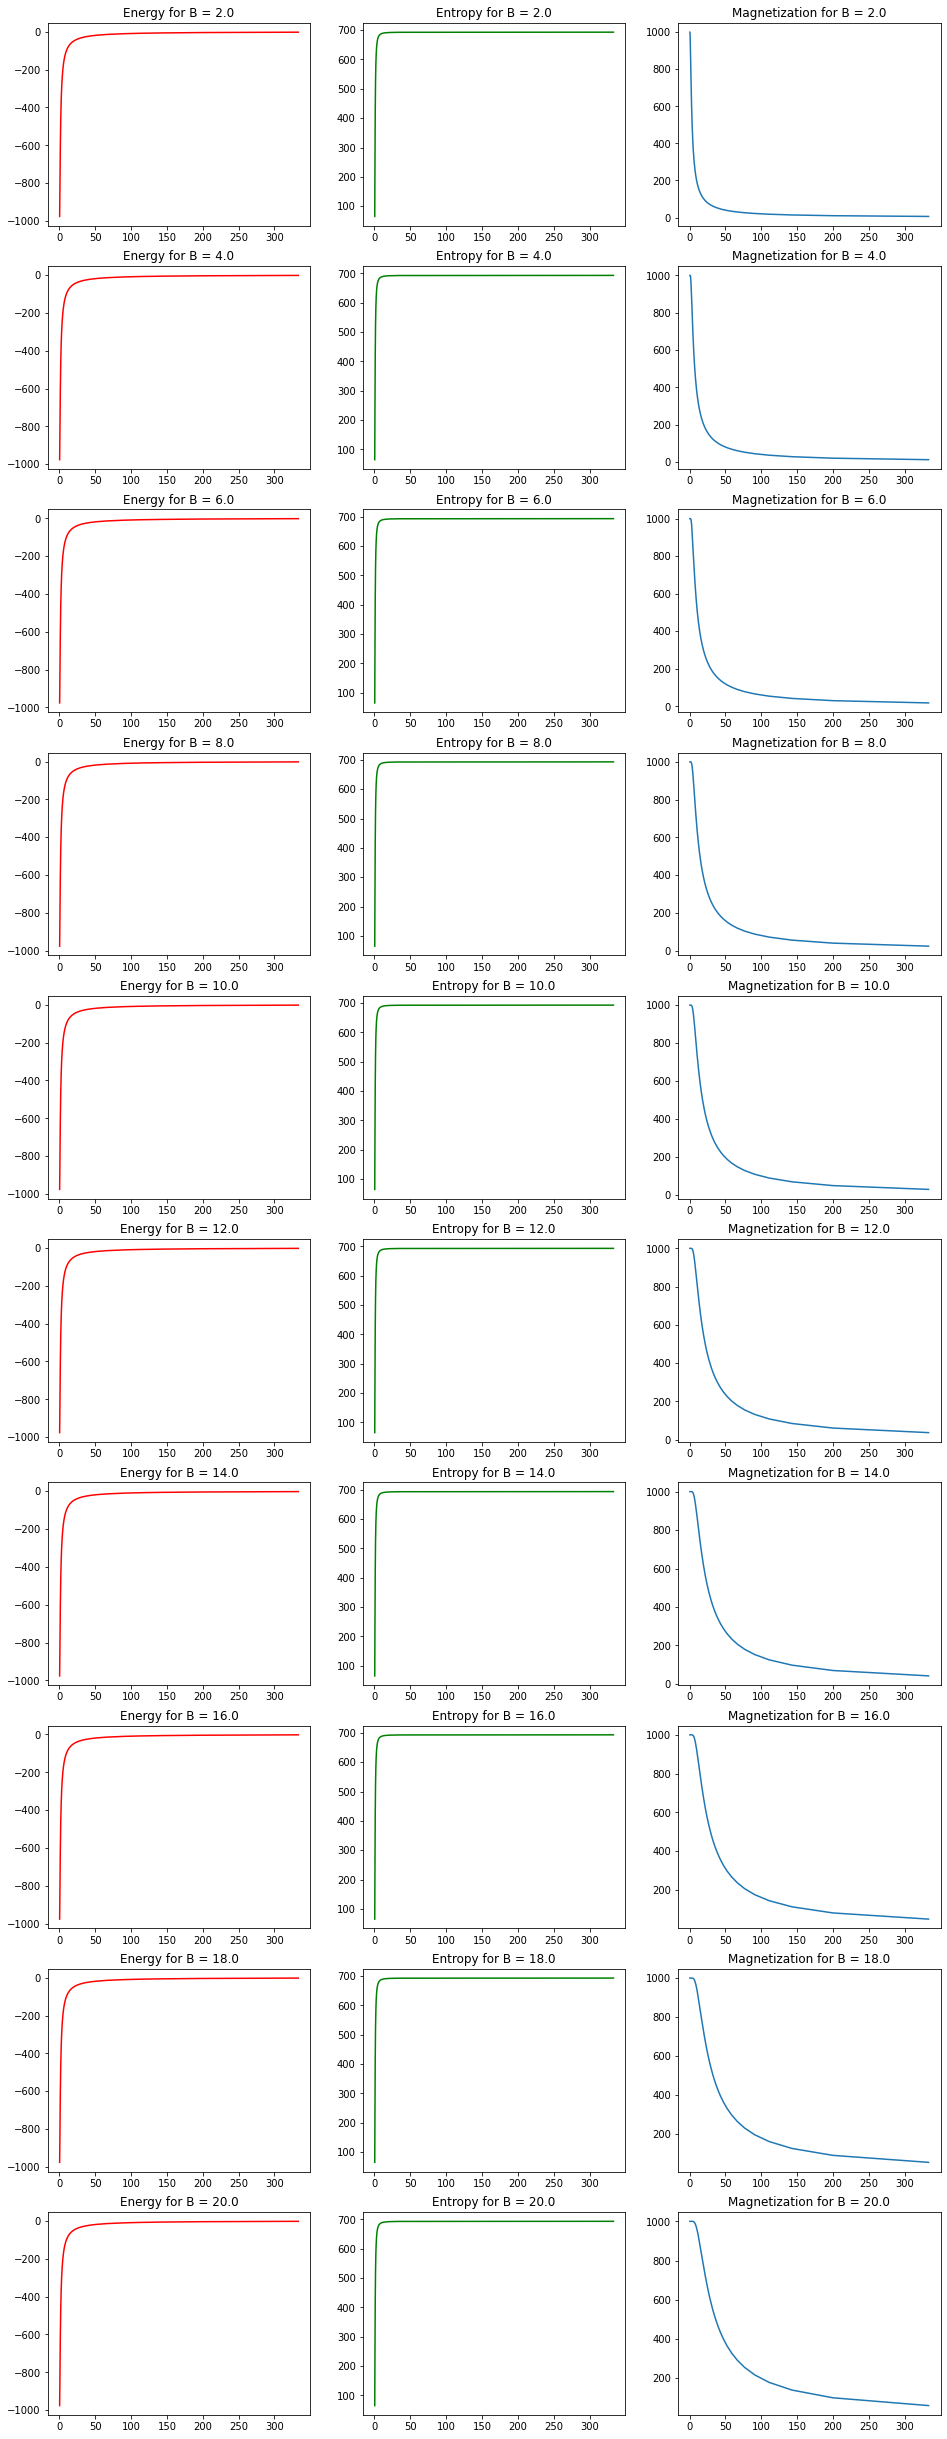

In [ ]:
# initializes number of electrons as well as the ranges of probabilities and mag.
# field strengths to iterate through
N = 1000
p1range = np.arange(0.01,0.99,0.001)
B_list = np.arange(2,20.01,2)

nPlots = len(B_list)
fig, ax = plt.subplots(nPlots, 3, figsize=(16,44))

# loop to iterate through B values
for i, B in enumerate(B_list):
  # creating lists to store results for all variables used in plotting for particular B value
  T_vals = []
  U_vals = []
  S_vals = []
  M_vals = []

  # loop to iterate through all probabilities
  for j in range(len(p1range)-1):
    # initializes the current probabilities
    p1 = p1range[j]
    p2 = 1-p1

    # calculates the theoretical number of up and down spin electrons based on the current 
    # probabilities
    n1 = N*p1
    n2 = N*p2

    # calculates the probabilities and number of electrons of each state for the next probability
    # iteration, so that we can use the finite difference method to compute the temperature
    p1_new = p1range[j+1]
    p2_new = 1 - p1_new
    n1_new = N*p1_new
    n2_new = N*p2_new

    # computing the temperature using the finite difference method
    T = ((n2_new-n1_new) - (n2-n1)) / (-N*(p1_new*math.log(p1_new) + p2_new*math.log(p2_new)) - (-N*(p1*math.log(p1) + p2*math.log(p2))))

    # if T is in our desired range (for plotting) then all of the variables of interest
    # are calculated and appended to their respective lists for polotting
    if T > 0 and T<= 400:
      U = n2 - n1
      S = -N*(p1*math.log(p1) + p2*math.log(p2))
      M = N*math.tanh(B/T)

      T_vals += [T]
      U_vals += [U]
      S_vals += [S]
      M_vals += [M]

  # plotting instructions
  B = round(B,1)
  ax[i][0].plot(T_vals, U_vals,color='red')
  ax[i][0].set_title("Energy for B = "+str(B))
  ax[i][1].plot(T_vals, S_vals,color='green')
  ax[i][1].set_title("Entropy for B = "+str(B))
  ax[i][2].plot(T_vals, M_vals)
  ax[i][2].set_title("Magnetization for B = "+str(B))

### **Results & Discussion**

Due to the fact that there are so many results, it is not really logical to try and pull anything major from the first cell of printed results, when we can instead turn to our plots, which give a much easier to understand visualization. The first thing that one will notice upon analyzing the plots is that all of the experimental results line up nearly perfectly with those expected in theory. However, we must first complete some deeper analysis to confirm that these are indeed what we would expect. 

First, looking at the plots of total energy versus temperature, we can see that for extremely small values of temperature, the energy appears to be minimized (or at a maximal negative value). We expect that for low temperature, the spin orientations of the electrons should have a higher tendancy to be one of two directions. In our case, by the way that we have defined the energy, this tendancy is to point down. From this we would expect that at very low temperatures, our system should approach a maximally negative total energy, which is indeed the case from our graphs. Turning to the entropy graphs, we can use similar reasoning to deduce that these results are indeed correct. Given that at low temperatures, the electron spins are likely to nearly all be down, one would expect that the entropy would be minimized given how predictable the system is in this state. From our graphs, we see these results exemplified, and as the temperature increases, so does the entropy, which is as expected. Given that the magnetization is purely determined from the magnetic field strength and the temperature, it is clear that the results for these plots are also holding true to what is expected in theory; as the temperature increases, the magnetization of the Pauli paramagnet decreases. Keeping all of this in mind, it is clear that the program is producing accurate results, so we now turn our attention to analyzing how the system changes for different strengths of external magnetic fields.

First, it is important to note that the curves given by the experimental results for energy and entropy are not perfectly smooth as they are in theory. This is expected, given that experimentally, although the states depend on the probabilities, there is still a degree of randomness which causes some slight variations to arise. Overall, we can see that all the trends line up perfectly.

One will notice that as the magnetic field strength increases, the energies and entropies of the paramagnet seem to take longer to reach their steady state maximal (or minimal negative) values. Once again, this is entirely expected, given that for stronger magnetic fields, the spin orientations of the electrons are going to be much more inclined to align with the external magnetic field. Thus a higher temperature is needed to distort these tendancies and cause the more balanced spin orientations that result in the steady state maximal entropy and minimal energy. As for the magnetization, we can see that in all cases, the curves appear to be identically smooth to those that are expected in theory. This is simply due to the fact that the calculation of the magnetization has no degree of randomness, since it only depends on the current temperature and magnetic field strength. We do however see a similar pattern in the rate of change of the magnetization for different magnetic field strenght. In particular, as the magnetic field strength increases, the magnetization of the system decays slower. Once again, this is completely expected, for the same reason that with higher magnetic fields, the electron spins have a higher tendancy to align with the field, and require a higher temperature to be disrupted. Overall it is clear that all of the results from the first part of this problem are pointing to the fact that this program gives an accurate representation of the Pauli Paramagnet.

As for the second part of this problem, we can easily compare the second set of graphs to those analyzed previously, in which one will observe very similar results. To be precise, we actually see almost identical results, however there is one major difference, which is the main reason that I opted to create these plots for different magnetic field strengths. For this method of determining the variables corresponding to the system, we see that as the magnetic field increases, there is no change in how long it takes the energy or entropy to reach their 'steady states'. This is simply due to the fact that for this method, as specified in the assignment details, the magnetic field strength is not dictating the relative probilitites of spin states as they were in the previous method. For this reason, since we are simply varying the probabilities in the same way for each magnetic field strength, we don't see any change in the temperature required to overcome the magnetic field and produce maximal entropy, or minimal energy. We do however see this pattern in the magnetization plots, because this method again uses the simple calculation that depends on magnetic field strength to compute the magnetization. 

Overall, it is clear that all of the results produced for this problem are being computed properly by my program, given that they can all be explained by what is expected in theory.


## **Problem 4.1.3 - Simulating the Spin-1 Pauli Paramagnet**

### **Methodology**

For this problem, I was tasked with investigating the exact same state variables as was done in the previous problem, however this time in regard to the spin-1 Pauli paramagnet. This version of the system represents one in which each of the atoms can instead exhibit one of three spin states instead of two, which we call up, right, and down. Although this complicates things slightly, I was able to pretty much use identical methods to that executed in part (b) of the first problem, with some slight modifications. For this reason, the methodology described in this section will be quite limited, as most of my code has already been explained, and I will only go into detail regarding the changes that needed to be made for this system.

One major difference between this and the last system, is that we now require three probabilities instead of two, which were derived in the lecture notes to be

$$p_1=\frac{2}{3}-\frac{1}{2}\frac{U}{N}-\frac{1}{3}\sqrt{1-\frac{3}{4}\left(\frac{U}{N}\right)^2}$$

$$p_2=-\frac{1}{3}+\frac{2}{3}\sqrt{1-\frac{3}{4}\left(\frac{U}{N}\right)^2}$$

$$p_3=\frac{2}{3}+\frac{1}{2}\frac{U}{N}-\frac{1}{3}\sqrt{1-\frac{3}{4}\left(\frac{U}{N}\right)^2}$$

where by the way I defined my program $p_1$, $p_2$, and $p_3$ correspond to the probability of a given atom to have spin down, right, and up, respectively.

Although we now have three different possible states for this system, it is important to note that when an atom's spin is oriented right, it corresponds to a zero contribution of energy, and thus the energy calculation remained pretty much the same, being the difference between spin down and spin up atoms. 

To begin the process of simulating the spin-1 Pauli paramagnet, I started by defining a quick function called smart_log. This was just done to shorten my code for computing the entropy. Since $\ln{0}$ is undefined, any time that one of the probabilities is zero, the entropy calculation would give an error. To avoid this, I simply created a new log function that first checked if the arguement was zero, in which case a zero value was returned instead of the natural log. Next, I defined a similar master function as was created previously, just so I could more readilly produce results for the system in different conditions. Within this function, I first created empty lists to store all three probabilities, as well as the values of $S$, $T$, and $M$. The idea for this problem was to obtain all the values of interest using only the range of possible $U$ values. Since $U$ may be anywehere in the range $-N$ to $N$, I created a list using NumPy's arange function, to correspond to this range in increments of 1. I then initialized a for loop to iterate through all of these total energy values. Within each iteration, the first thing that my program does is compute all of the probabilities, which are entirely dependent on the energy. These probabilities are then appended to their respective lists, for plotting purposes. Using these probabilities, at this point there is enough information to also calculate and store the entropy pertaining to this iteration, which is then done. This process is repeated until all probabilitiies and entropies corresponding to our range of U values have been computed and stored. Next, I added code to iterate through all of the $U$ values onces again, but this time in each iteration, the finite difference method is employed using the current $U$ and corresponding $S$ values, in order to compute the temperature. Once again, this temperature is added to it's list for plotting purposes. Finally, after all temperatures have been stored, the only unknown that is left to find is the magnetization corresponding to each energy. This calculation had to be done last, given that it is dependent on the temperature, and thus can only be found after the last step is complete. I simply initiate a similar loop to go through all of the temperature values, and calculate / store the corresponding magnetization value. Once this process is complete, we are left with lists of all three probabilities, as well as $U$, $S$, $T$, and $M$, which are then returned by the function.

Using this function, all of the necessary coding needed to analyze the system is essentially finished, and all that is left to do is produced results. To do so, I created three separate code cells, corresponding to three different magnetic field strengths. Within each code cell, I call the master function, passing the field strength as an arguement, which returns the desired lists of variables. After this is done, for each cell I simply create four plots; probabilities, energy, entropy, and magnetization, all as a function of temperature. It is important to note that I cut down the bounds of these plots by a lot, in order to view the extreme behaviour of these variables as they change with the temperature. I also opted to completely cut out the negative temperature values, as they don't really correspond to anything that has meaning physically, and the results are essentially the same but inverse on the other side of the y-axis (this is easily changed in the plotting instructions if one desires).

### **Code**

In [ ]:
# smart log function to avoid errors from log(0)
def smart_log(p):
  if p < 0.000000001:
    return 0
  else:
    return math.log(p)

# this function is just to cut down on code length as there is a ton of plotting instructions
def full_plot():
  fig, ax = plt.subplots(2,2, figsize=(12,12))
  ax = ax.flatten()

  p_third = [1/3 for i in range(len(U))]
  ax[0].plot(T,p1, color = 'red', label = 'P(Spin Down)')
  ax[0].plot(T,p2, color = 'blue', label = 'P(Spin Right)')
  ax[0].plot(T,p3, color = 'green', label = 'P(Spin Up)')
  ax[0].plot(T,p_third, color = 'black', label = 'P = 1/3')
  ax[0].set_xlim(0,20)
  ax[0].set_xlabel("Dimensionless Temperature")
  ax[0].set_ylabel("Probability")
  ax[0].title.set_text("Probabilities of Spins vs Temperature for B = "+str(B))
  ax[0].legend()

  ax[1].plot(T,U, 'ro', markersize = 2)
  ax[1].set_xlim(0,20)
  ax[1].set_ylim(-1000,0)
  ax[1].set_xlabel("Dimensionless Temperature")
  ax[1].set_ylabel("Dimensionless Total Energy")
  ax[1].title.set_text("Total Energy vs Temperature for B = "+str(B))

  ax[2].plot(T,S, 'go', markersize = 2)
  ax[2].set_xlim(0,20)
  ax[2].set_xlabel("Dimensionless Temperature")
  ax[2].set_ylabel("Dimensionless Entropy")
  ax[2].title.set_text("Entropy vs Temperature for B = "+str(B))

  ax[3].plot(T,M, 'bo', markersize = 2)
  ax[3].set_xlim(0,20)
  ax[3].set_ylim(0,1000)
  ax[3].set_xlabel("Dimensionless Temperature")
  ax[3].set_ylabel("Dimensionless Magnetization")
  ax[3].title.set_text("Magnetization vs Temperature for B = "+str(B))

  plt.show()

In [ ]:
# master function to find all quantities of interest based on the given field strength
def find_variables_1(N,B):
  # empty lists to keep track of all results
  p1_list = []
  p2_list = []
  p3_list = []

  S_list = []
  T_list = []
  M_list = []
  # defining range of U values
  U_list = np.arange(-N,N,1)

  # for loop that iterates through all of the U values
  for U in U_list:
    # calculating all probabilities according to the formulas derived
    p1 = (2/3) - (1/2)*(U/N) - (1/3)*math.sqrt(1 - (3/4)*((U/N)**2))
    p2 = -(1/3) + (2/3)*math.sqrt(1 - (3/4)*((U/N)**2))
    p3 = (2/3) + (1/2)*(U/N) - (1/3)*math.sqrt(1 - (3/4)*((U/N)**2))

    # appending these probabilities to their respective lists
    p1_list += [p1]
    p2_list += [p2]
    p3_list += [p3]

    # calculates and stores the entropy
    S = -N*(p1*smart_log(p1) + p2*smart_log(p2) + p3*smart_log(p3))
    S_list += [S]

  # loop to calculate and store all of the temperatures using the finite difference method
  for i in range(len(U_list)-1):
    T = (U_list[i] - U_list[i+1]) / (S_list[i] - S_list[i+1])
    T_list += [T]
  T_list += [T]

  # calculates and stores the corresponding magnetization for each temperature
  for T in T_list:
    M = N*math.tanh(B/T)
    M_list += [M]

  return p1_list, p2_list, p3_list, U_list, S_list, T_list, M_list

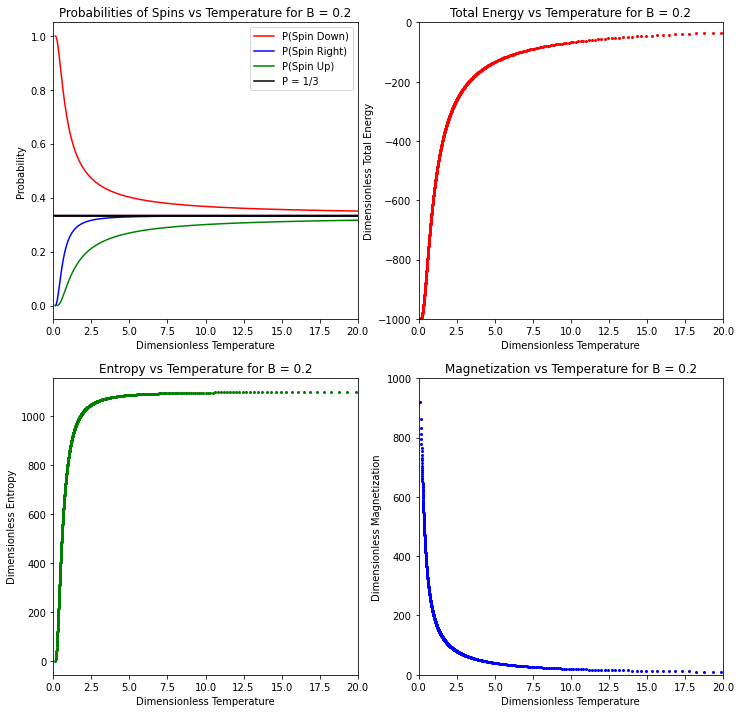

In [ ]:
#initializing N=1000 and a magnetic field strength of 0.2 (down)
N = 1000
B = 0.2

# calling function to find all values of interest for this B value
p1, p2, p3, U, S, T, M = find_variables_1(N,B)

# plotting instructions
full_plot()

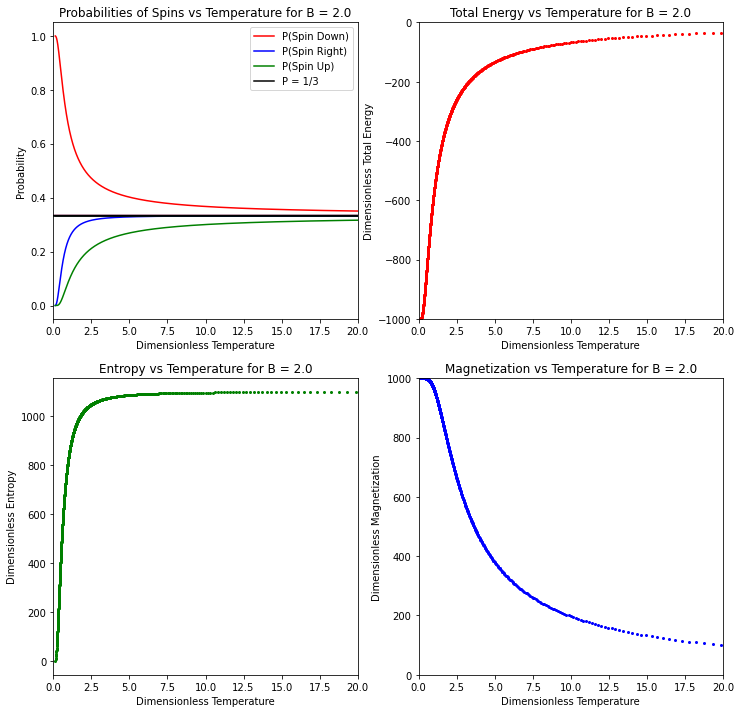

In [ ]:
# changing magnetic field strength to 2 and producing same results
N = 1000
B = 2.0

# calling function to find all values of interest for this B value
p1, p2, p3, U, S, T, M = find_variables_1(N,B)

# plotting instructions
full_plot()

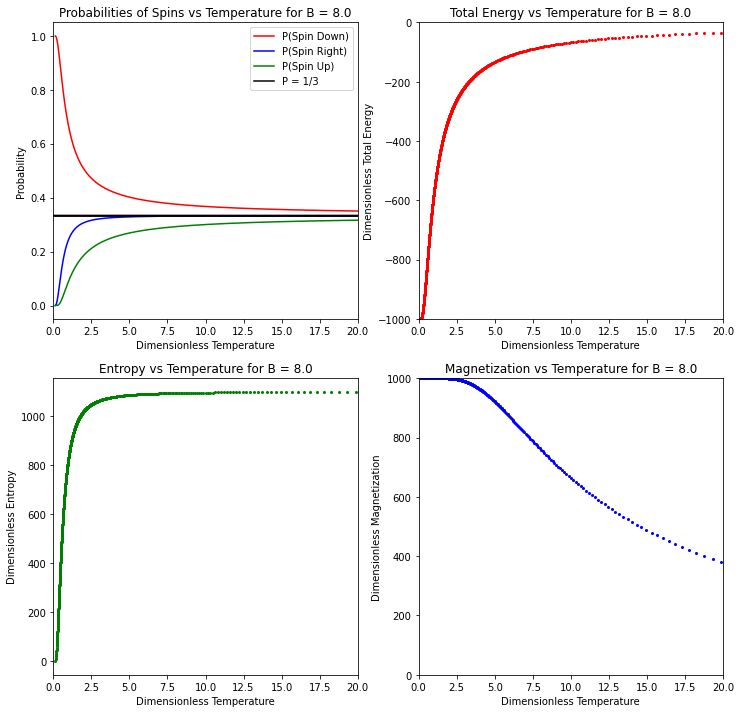

In [ ]:
# changing magnetic field strength to 8 and producing same results
N = 1000
B = 8.0

# calling function to find all values of interest for this B value
p1, p2, p3, U, S, T, M = find_variables_1(N,B)

# plotting instructions
full_plot()

### **Results & Discussion**

Overall, my program was able to succesfully produce plots of all of the data of interest. First, we can once again analyze the general trends of one set of plots to make sure that the results are correct by comparing them to what is expected in theory.

 Upon observing the graph of the three different probabilities as a function of temperature, we can analyze two limiting behaviours. First, in the limit of small temperature, we see that the probability of spin down ($p_1$) is equal to 1, whereas the other two are equal to zero. At this point, the temperature is low enough that it does not really have any effect on the spin orientations, so they are completely dictated by the magnetic field. Since I defined the magnetic field to point down, it is obvious that in the limit of small $T$, all of the atoms' spins should align with the field, which is evident in my plot. On the other hand, in the limit of large $T$, the probabilities should be evenly distributed. In my plot, we see that as $T$ gets large, the probabilities all approach $1/3$, which also aligns with what is expected in theoery. Both of these results were also derived in the lecture notes, which further solidifies my confidence that my program is working properly.

 As for the other three plots, we see some similar results as from the previous problem. In the lecture notes, it was also derived that when $U$ approaches $-N$ the spins should all be aligned with the magnetic field (since my field points down). Given that this point corresponds to the minimal temperature, comparing this with our probability plot reveals that the results are indeed exhibiting the expected behavior. Once again, as the temperature increases, we see that more variation in the spin orientation arises, which gives rise to the total energy's approach to zero (also evident in the plot). This increase in variation of spin orientation also corresponds to an increase in entropy, of which is also displayed in my third plot. As expected, entropy is minimized for small $T$, and grows to a maximal value for higher temperatures. Finally, my fourth plot of the magnetization versus temperature once again shows that the point of maximal magnetization corresponds with a minimal temperature, as is expected. Again, for small temperatures, the spins are more likely to all be aligned, which gives rise to high magnetization.

 Now that we have confirmed that everything is working properly, as our results line up with what is expected in theory, we can turn our attention to the effect that increasing the magnetic field (in the down direction) has on the system. Upon comparing the plots for each of the magnetic fields, one will notice that the probabilities, energy, and entropy plots remain identical. This occurs for the same reason that it did in part (b) of the previous problem. The probabilities remain the same for trivial reasons, but the rate of change of the energy and entropy remain the same due to the simple fact that for this method, they are not directly dependent on the magnetic field strength. The only factor that depicts the way in which these values change are the probabilities, and since the probabilities must remain the same, we see no changes in the decay / growth of these variables. We do however see a change in the way that the magnetization decays as a function of temperature. Since the magnetization is directly dependent on the field strength, we see that as the field increases, it takes longer for the magnetization to decay. Physically, this corresponds to the tendancy of the spin orientations to align with the magnetic field. For stronger magnetic fields, the system requires a higher temperature to disrupt the spin orientations of the atoms, which is why we see a much slower decay rate for higher magnetic fields.

 Once again, taking all of these results into consideration, it is clear that my programs were able to succesfully analyze the spin-1 Pauli paramagnet. All outputs were able to be confirmed by what is expected in theoery, and the idealized results that were predicted in class.

## **Conclusion**

Overall, throughout this assignment, I was able to employ several computational methods, as well as my theoretical knowledge regarding statistical mechanics in order to succesfully analyze both the half-spin Pauli paramagnet, as well as the 1-spin version. By analyzing the results that my code was able to produce, I was able to gain a much deeper insight into why these systems behave in the way that they do, and also learn more about the many applications of computational methods to the field of statistical mechanics.